<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/18.%20CNN/1_MNIST_CNN_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])
print(y_train[0].shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10,)


In [7]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

NN Variables

In [8]:
input_height = x_train.shape[1]
input_width = x_train.shape[2]
input_channels = 1
input_pixels = x_train.shape[1] * x_train.shape[2]

n_conv1 = 32
stride_conv1 = 1
conv1_f = 5 #filter size
max_pool1_k = 2

n_conv2 = 64
stride_conv2 = 1
conv2_f = 5 #filter size
max_pool2_k = 2

n_hidden = 1024
n_out = 10

input_to_hidden_from_conv2 = (input_width//(max_pool1_k*max_pool2_k)) * (input_height//(max_pool1_k*max_pool2_k)) * n_conv2

In [9]:
weights = {
    'wc1' : tf.Variable(tf.random.normal([conv1_f,conv1_f,input_channels,n_conv1])),
    'wc2' : tf.Variable(tf.random.normal([conv1_f,conv1_f,n_conv1,n_conv2])),
    'wh1' : tf.Variable(tf.random.normal([input_to_hidden_from_conv2,n_hidden])),
    'wo' : tf.Variable(tf.random.normal([n_hidden,n_out])),
}

biases = {
    'bc1' : tf.Variable(tf.random.normal([n_conv1])),
    'bc2' : tf.Variable(tf.random.normal([n_conv2])),
    'bh1' : tf.Variable(tf.random.normal([n_hidden])),
    'bo' : tf.Variable(tf.random.normal([n_out])),
}

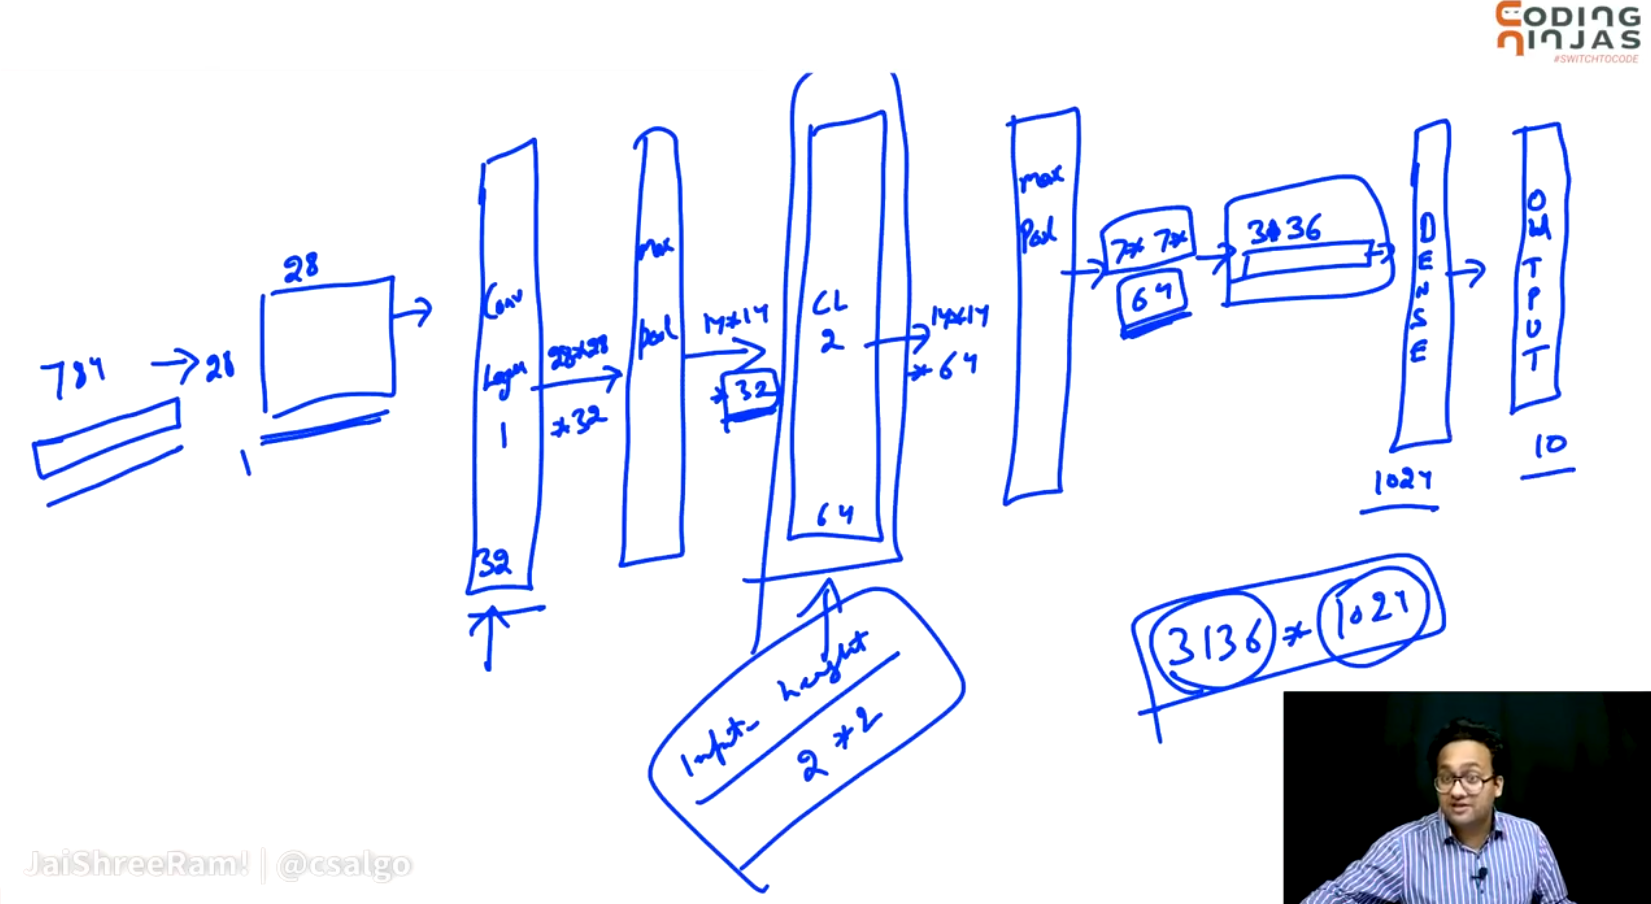

Forward Prop

In [10]:
def convLayer(x,weights,bias,s = 1):
  out = tf.nn.conv2d(x,weights,strides=[1,s,s,1],padding='SAME')
  out = tf.nn.bias_add(out,bias)
  out = tf.nn.relu(out)
  return out

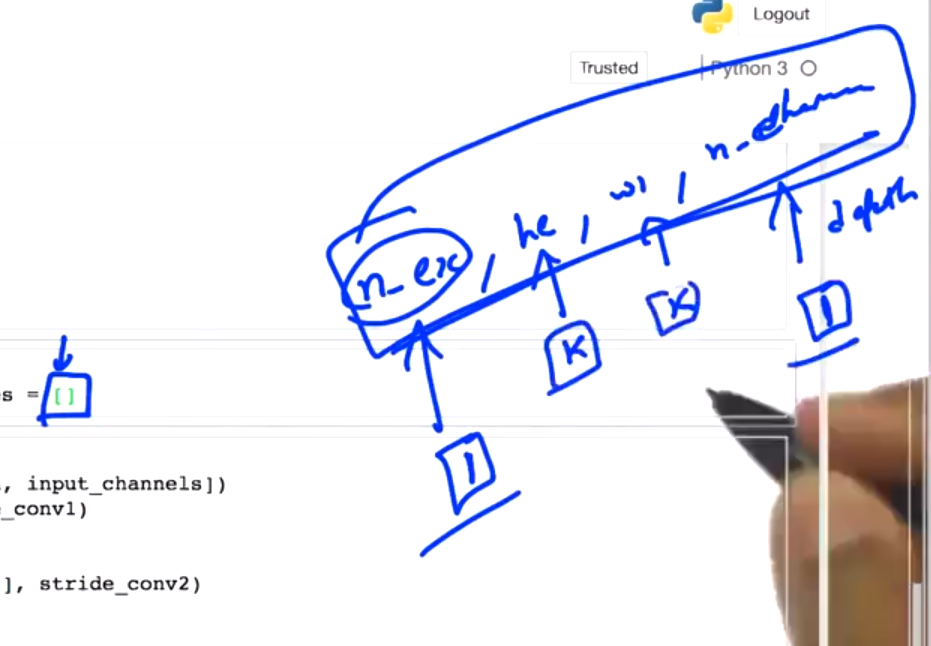

In [11]:
def maxPooling(x,k=2):
  return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')

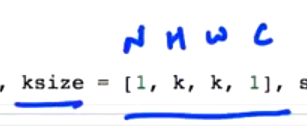

In [12]:
def forward_prop(x,weights,biases):
  x = tf.reshape(x,[-1,input_height,input_width,input_channels])
  out_conv1 = convLayer(x,weights['wc1'],biases['bc1'])
  out_conv1_pool = maxPooling(out_conv1,max_pool1_k)

  out_conv2 = convLayer(out_conv1_pool,weights['wc2'],biases['bc2'])
  out_conv2_pool = maxPooling(out_conv2,max_pool2_k)

  out_conv2_pool_flattened = tf.reshape(out_conv2_pool,[-1,input_to_hidden_from_conv2])

  in_hidden_layer = tf.add( tf.matmul(out_conv2_pool_flattened,weights['wh1']), biases['bh1'])
  out_hiddent_layer = tf.nn.relu(in_hidden_layer)

  in_output = tf.add( tf.matmul(out_hiddent_layer,weights['wo']), biases['bo'])
  out_output = in_output
  return out_output

Optimizations

In [13]:
optimize = None
batch_size = 100
for i in range(25):
  num_batches = (x_train.shape[0]//batch_size)
  total_cost= 0
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  for j in range(num_batches):
    with tf.GradientTape(persistent=True) as tape:
      pred = forward_prop(x_train[j*batch_size:(j+1)*batch_size,:,:],weights,biases)
      cost = tf.math.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels = y_train[j*batch_size:(j+1)*batch_size,:]))
    optimize = optimizer.minimize(cost,var_list=[weights,biases],tape=tape)
    total_cost += cost
  print(total_cost)

tf.Tensor(271833470.0, shape=(), dtype=float32)
tf.Tensor(12309984.0, shape=(), dtype=float32)
tf.Tensor(4828017.0, shape=(), dtype=float32)
tf.Tensor(2815128.8, shape=(), dtype=float32)
tf.Tensor(1795238.0, shape=(), dtype=float32)
tf.Tensor(1398967.2, shape=(), dtype=float32)
tf.Tensor(1111148.6, shape=(), dtype=float32)
tf.Tensor(1020332.94, shape=(), dtype=float32)
tf.Tensor(873268.5, shape=(), dtype=float32)
tf.Tensor(749470.06, shape=(), dtype=float32)
tf.Tensor(669302.06, shape=(), dtype=float32)
tf.Tensor(570992.1, shape=(), dtype=float32)
tf.Tensor(537348.5, shape=(), dtype=float32)
tf.Tensor(580056.25, shape=(), dtype=float32)
tf.Tensor(490554.56, shape=(), dtype=float32)
tf.Tensor(634036.94, shape=(), dtype=float32)
tf.Tensor(586331.06, shape=(), dtype=float32)
tf.Tensor(535845.8, shape=(), dtype=float32)
tf.Tensor(581265.2, shape=(), dtype=float32)
tf.Tensor(506711.66, shape=(), dtype=float32)
tf.Tensor(509351.5, shape=(), dtype=float32)
tf.Tensor(493904.22, shape=(), dtype

In [14]:
optimize,cost

(<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=600>,
 <tf.Tensor: shape=(), dtype=float32, numpy=21971.27>)

Testing Score

In [16]:
pred = forward_prop(x_test,weights,biases)
predictions = tf.argmax(pred,axis=1)
true_labels = tf.argmax(y_test,axis=1)
correct_predictions = tf.equal(predictions,true_labels)

In [17]:
predictions,true_labels,correct_predictions

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>,
 <tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>,
 <tf.Tensor: shape=(10000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>)

In [18]:
correct_predictions.numpy().sum() #testing accuracy

9841